## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [347]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [348]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

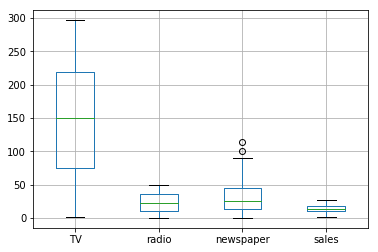

In [349]:
df.boxplot(return_type='axes')
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

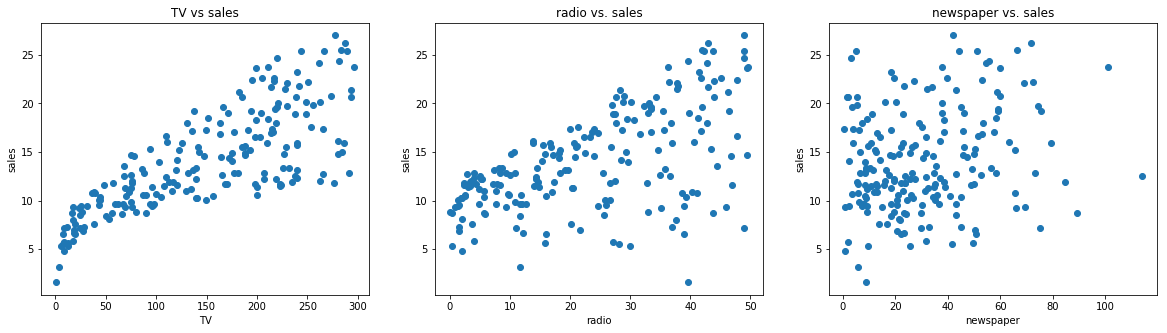

In [350]:
from pandas.tools.plotting import scatter_matrix 
fig = plt.figure()
fig.set_size_inches(20,5)

sub1 = fig.add_subplot(1,3,1)
plt.scatter(df.TV, df.sales)
sub1.set_title("TV vs sales")
sub1.set_xlabel("TV")
sub1.set_ylabel("sales")

sub2 = fig.add_subplot(1,3,2)
plt.scatter(df.radio, df.sales)
sub2.set_title("radio vs. sales")
sub2.set_xlabel("radio")
sub2.set_ylabel("sales")

sub3 = fig.add_subplot(1,3,3)
plt.scatter(df.newspaper, df.sales)
sub3.set_title("newspaper vs. sales")
sub3.set_xlabel("newspaper")
sub3.set_ylabel("sales")

plt.show()

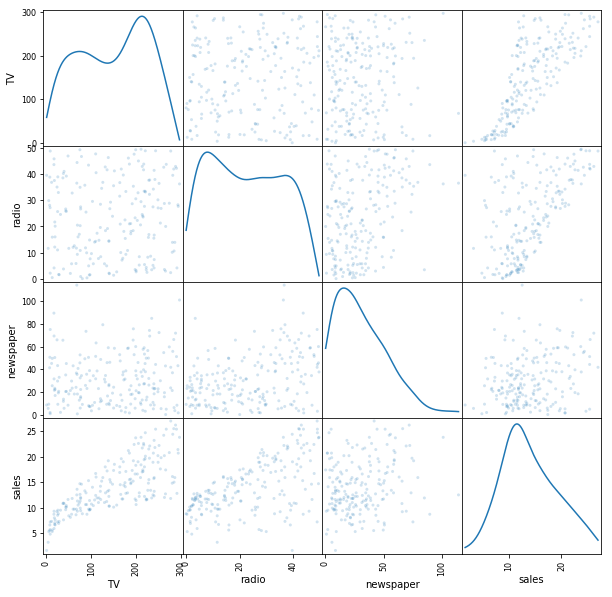

In [351]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

Answer: From the plots above, TV and radio seem to correlation with sales. But not very strongly.
From the table below, we can see correlation between TV and sales is about 0.78, and the correlation betweem radio and sales is about 0.57. 

In [352]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [353]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

a) Set y to be the sales in df

In [354]:
y=df['sales']

b) Set X to be just the features described above in df

In [355]:
x=df.drop(['sales'],1)
print(x)

        TV  radio  newspaper
1    230.1   37.8       69.2
2     44.5   39.3       45.1
3     17.2   45.9       69.3
4    151.5   41.3       58.5
5    180.8   10.8       58.4
6      8.7   48.9       75.0
7     57.5   32.8       23.5
8    120.2   19.6       11.6
9      8.6    2.1        1.0
10   199.8    2.6       21.2
11    66.1    5.8       24.2
12   214.7   24.0        4.0
13    23.8   35.1       65.9
14    97.5    7.6        7.2
15   204.1   32.9       46.0
16   195.4   47.7       52.9
17    67.8   36.6      114.0
18   281.4   39.6       55.8
19    69.2   20.5       18.3
20   147.3   23.9       19.1
21   218.4   27.7       53.4
22   237.4    5.1       23.5
23    13.2   15.9       49.6
24   228.3   16.9       26.2
25    62.3   12.6       18.3
26   262.9    3.5       19.5
27   142.9   29.3       12.6
28   240.1   16.7       22.9
29   248.8   27.1       22.9
30    70.6   16.0       40.8
..     ...    ...        ...
171   50.0   11.6       18.4
172  164.5   20.9       47.4
173   19.6   2

c) Randomly split data into training and testing - 80% training, 20% testing.

In [356]:
x_train, x_test,y_train,y_test=train_test_split(
x,y,test_size=0.2,random_state=45)

d) Train model on training data, and make predictions on testing data

In [357]:
regr = LinearRegression()
regr.fit(x_train,y_train)
print('Coefficients: \n', regr.coef_)
print("Residual sum of squares: %.2f"
     % np.mean((regr.predict(x_test) - y_test) ** 2))

Coefficients: 
 [ 0.04699362  0.18346139 -0.00486456]
Residual sum of squares: 2.26


In [358]:
print('R^2 Score:%.2f'%regr.score(x_test,y_test))

R^2 Score:0.90


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

Answer: From the value which shows above, we can see that the value of R^2 is 0.9, it is very good.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

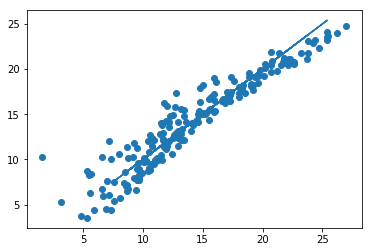

In [359]:
plt.scatter(y,regr.predict(x))
plt.plot(y_test,y_test)

Answer: Based on the plot above, the model seems good, So it is a good model.


g) Can you measure the importance of features in this model? What is something you should check before making conclusions?
Try looking at LinearRegression().coef_

Coefficients: 
 [ 0.0472521   0.179922   -0.00094408]
Residual sum of squares: 2.79
Variance score: 0.90


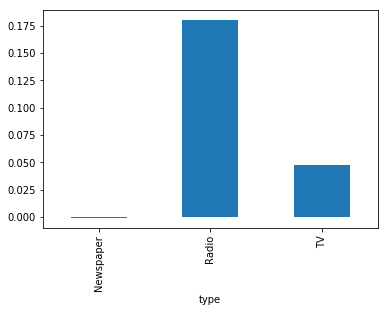

In [360]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
x2 = x.as_matrix().astype(np.float)
x2 = scaler.fit_transform(x)

size = float(len(x))
x_train = x[0:int(size*0.8)]
x_test = x[int(size*0.8):]

y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

regr = LinearRegression()

regr.fit(x_train, y_train)

print('Coefficients: \n', regr.coef_)

print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))

print('Variance score: %.2f' % regr.score(x_test, y_test))

regr.coef_
df = pd.DataFrame({'type':['TV','Radio','Newspaper'], 'coef':regr.coef_})

df.groupby('type')['coef'].mean().plot(kind='bar')


Answer: From the figure above, we can see that the radio is the most significant impact out of all the variables.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?


Coefficients: 
 [ 0.77430407  0.50534068 -0.00398213]
Residual sum of squares: 0.10
Variance score: 0.90


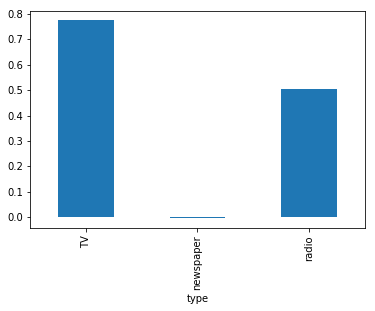

In [361]:
x_train = preprocessing.scale(x_train)
y_train = preprocessing.scale(y_train)
x_test = preprocessing.scale(x_test)
y_test = preprocessing.scale(y_test)

# Train the model using the training sets
regr.fit(x_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))
regr.coef_
df = pd.DataFrame({'type':['TV','radio','newspaper'], 'coef':regr.coef_})
df.groupby('type')['coef'].mean().plot(kind='bar')

Answer h): If we normalized the data, we can see that the TV is the most signaficiant impact out of all variables. But if we did not normalied data, it is the radio. So we should nomarlized the data before we make the conclusion.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

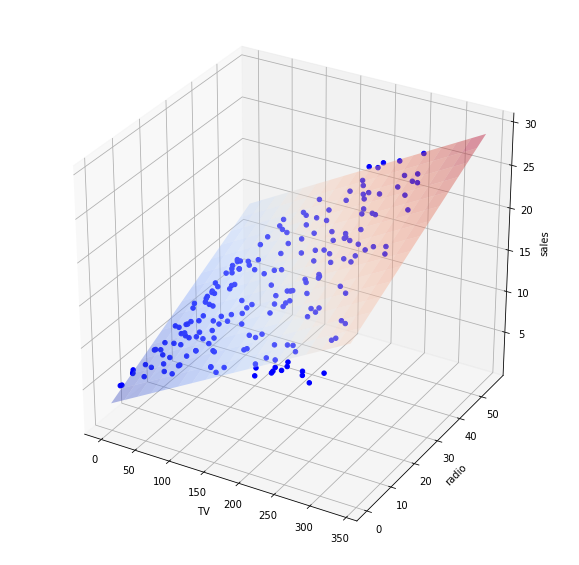

In [362]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV + radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.values.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

plt.show()

Answer: From the figure above, it seems that some points are hyperplane, and there is some nonlinear interaction for the TV and radio.

Coefficients: 
 [ 0.0190582   0.02365677  0.00388692  0.00110261]
Residual sum of squares: 0.42
Variance score: 0.98


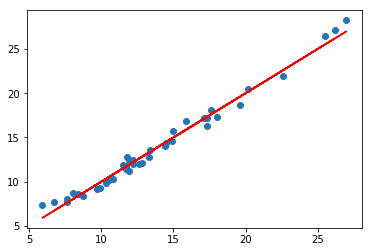

In [363]:
x['TV*radio']=x['TV']*x['radio']
size = float(len(x))

x_train = x[0:int(size*0.8)]
x_test = x[int(size*0.8):]


y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]


regr = LinearRegression()


regr.fit(x_train, y_train)


print('Coefficients: \n', regr.coef_)

print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))

print('Variance score: %.2f' % regr.score(x_test, y_test))
plt.scatter(y_test,regr.predict(x_test))
plt.plot(y_test,y_test,color='r')

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 28 Feb 2018   Prob (F-statistic):          6.68e-146
Time:                        22:04:40   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

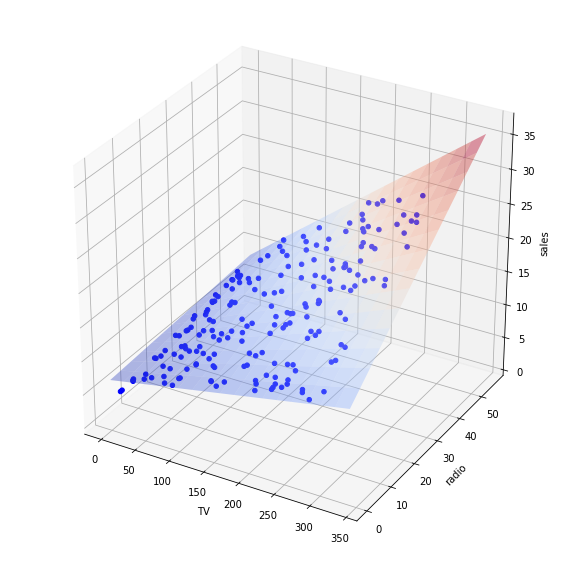

In [364]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# Create a linear OLS model with TV:Radio interaction term 
# such that Sales = beta_0 + beta_1 * TV + beta_2 * Radio + beta_3 * Radio * TV
model = sm.ols(formula='sales ~ TV * radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20) 
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)

# Create surface plot
ax.plot_surface(x_surf, y_surf,
                out.values.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

# Create scatter plot
ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

# Print OLS regression results
print (fit.summary())

plt.show()

In [365]:
# nonlinear-non parametric model
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
y = df['sales']
x=df.drop(['sales'],1) 

from sklearn.tree import DecisionTreeRegressor

# We Choose 80% for training, 20% for testing. This should really be done randomly.
size = float(len(x))
x_train = x[0:int(size*0.8)]
x_test = x[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = DecisionTreeRegressor(max_depth=5)

# Train the model using the training sets
regr.fit(x_train, y_train)


# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")



Residual sum of squares: 0.94
Variance score: 0.96


## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


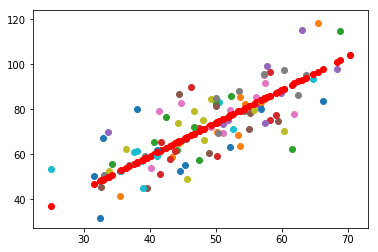

In [366]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]
errors=[]

def run(num_iterations,learning_rate = 0.0001):
    points = genfromtxt("/Users/yumeichen/Downloads/APMAE4990--master/data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

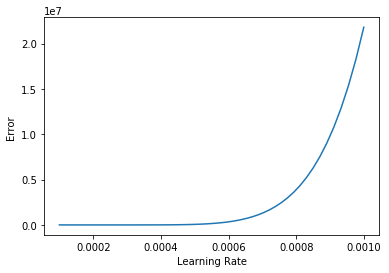

In [367]:
points = genfromtxt("/Users/yumeichen/Downloads/APMAE4990--master/data/data.csv", delimiter=",")

initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 3
#print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
#print "Running..."
errors=[]
learning_rates = np.logspace(-4,-3,100)

for l in learning_rates:
    learning_rate = l
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.xlabel('Learning Rate')
plt.ylabel('Error ')

plt.plot(learning_rates,errors,label='num_iterations='+str(num_iterations))


    

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


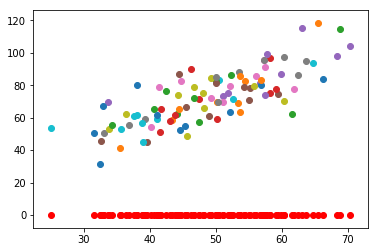

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


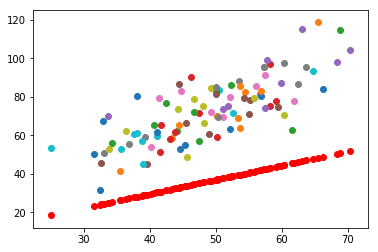

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


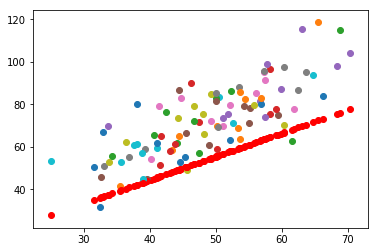

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


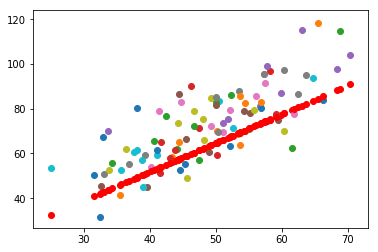

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


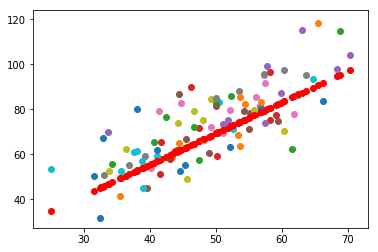

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


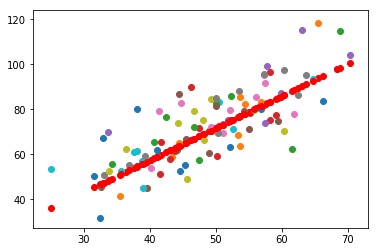

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


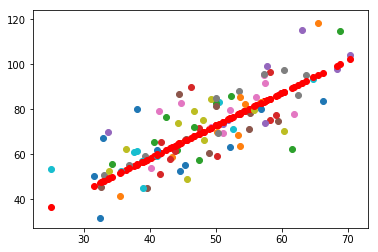

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


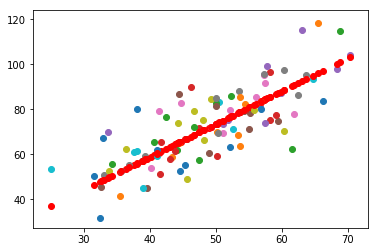

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


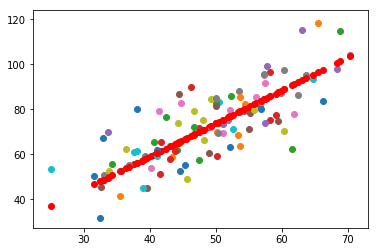

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


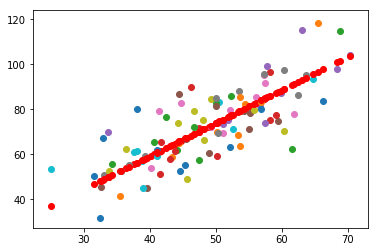

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


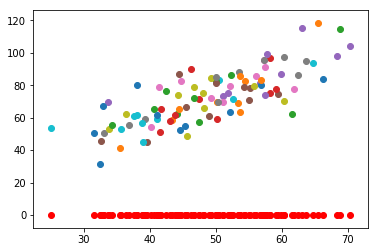

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 1454.7010110737297, m = 73707.02973591052, error = 13542667625800.89


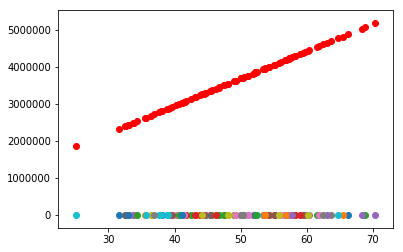

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -72197663.21675964, m = -3673303989.60748, error = 3.3636916490400677e+22


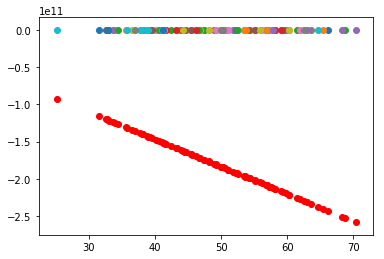

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 3598149177362.046, m = 183068173802790.72, error = 8.354647564678013e+31


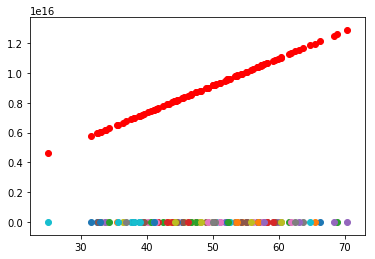

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -1.7932264810999088e+17, m = -9.123654438117506e+18, error = 2.075105069452479e+41


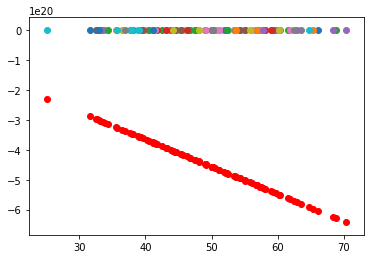

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 8.936986917486659e+21, m = 4.546998452928957e+23, error = 5.154090601586419e+50


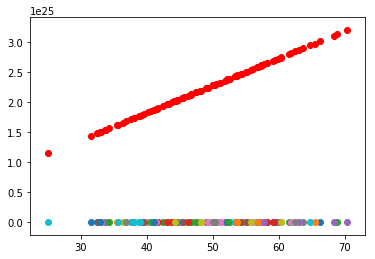

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -4.453968085187882e+26, m = -2.2661089447403784e+28, error = 1.2801592709891363e+60


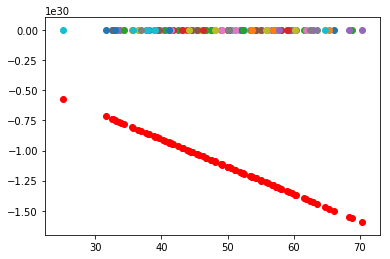

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 2.2197449640500537e+31, m = 1.1293713430063897e+33, error = 3.179625438860186e+69


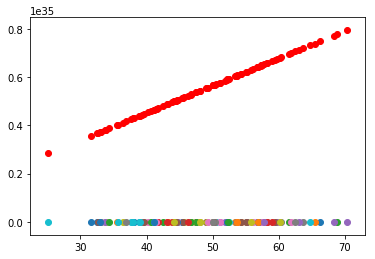

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -1.1062647084993037e+36, m = -5.628500930480129e+37, error = 7.897468823262245e+78


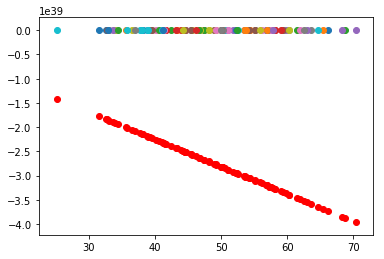

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 5.513343312369162e+40, m = 2.8051024068030055e+42, error = 1.9615522335472674e+88


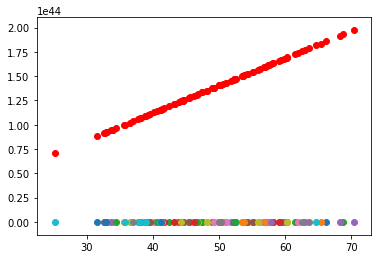

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


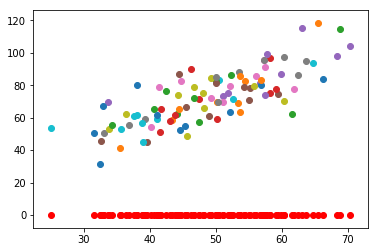

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0014547010110737297, m = 0.07370702973591052, error = 5035.166806835488


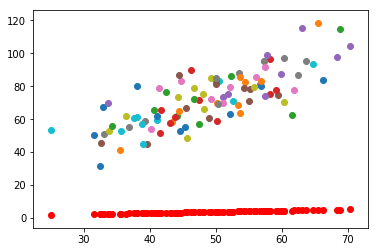

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0028372014495286774, m = 0.14374060806815414, error = 4556.7323715944


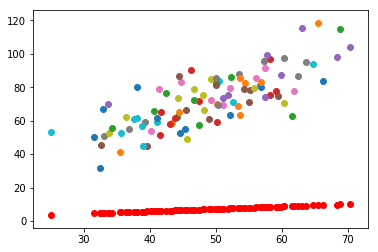

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.004151099681139559, m = 0.21028381419066666, error = 4124.798445175136


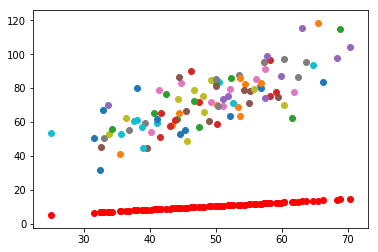

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.005399814734639951, m = 0.27351060291065116, error = 3734.8455006002387


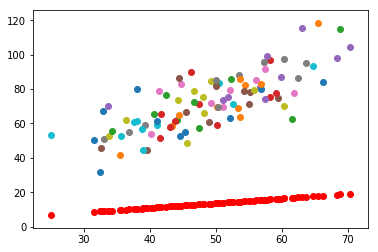

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.006586595239605855, m = 0.3335862593940432, error = 3382.7932775716404


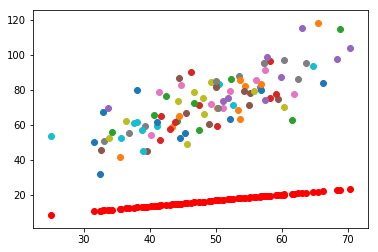

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0077145279188888345, m = 0.3906678312471585, error = 3064.958088795723


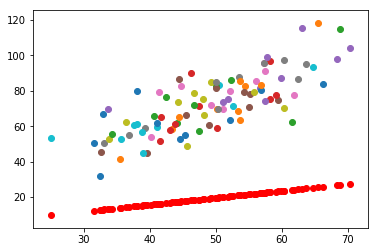

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.008786545657799282, m = 0.4449045390640527, error = 2778.014275837526


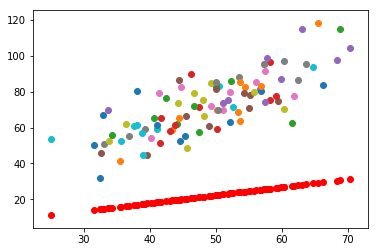

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.009805435171133943, m = 0.49643816651282946, error = 2518.959411198589


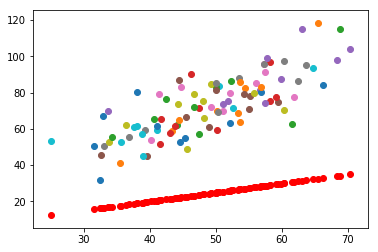

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.010773844288090539, m = 0.5454034309806438, error = 2285.082882511535


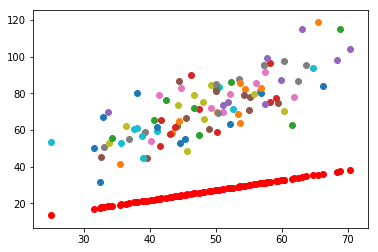

In [368]:
# Use this to visually discuss convergence rate based on learning rate

#for num in range(0,10):
#    run(num)
#    plt.show()
# A good learning rate
for num in range(0,10):
    run(num)
    plt.show()
    
# A bad learning rate    
learning_rate = 10
for num in range(0,10):
    run(num,learning_rate)
    plt.show()
    
 #   An inefficient learning rate
learning_rate = 0.00001
for num in range(0,10):
    run(num,learning_rate)
    plt.show()
    

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

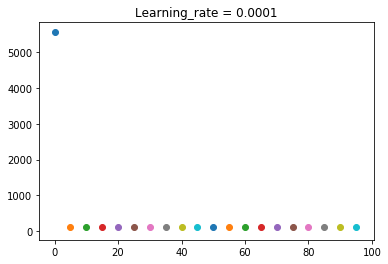

In [369]:
def errorplot(num_iterations, learning_rate):
    points = genfromtxt("/Users/yumeichen/Downloads/APMAE4990--master/data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error =  compute_error_for_line_given_points(b, m, points)
    plt.scatter(num_iterations, error)
    
Learning_rate = 0.0001
for num in range(0,100,5):
    errorplot(num, Learning_rate)
    plt.title('Learning_rate = 0.0001')
    
    


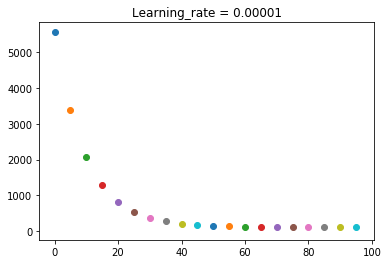

In [370]:
Learning_rate = 0.00001
for num in range(0,100,5):
    errorplot(num, Learning_rate)
    plt.title('Learning_rate = 0.00001')


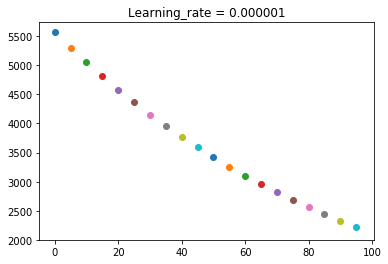

In [371]:
Learning_rate = 0.000001
for num in range(0,100,5):
    errorplot(num, Learning_rate)
    plt.title('Learning_rate = 0.000001')

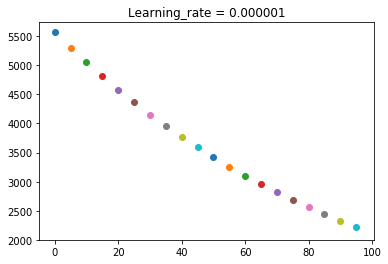

In [372]:
Learning_rate = 0.000001
for num in range(0,100,5):
    errorplot(num, Learning_rate)
    plt.title('Learning_rate = 0.000001')